In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Importing 'PARKS_NM' as string following warning

data=pd.read_csv('NYPD_Complaint_Data_Historic.csv', dtype = {'PARKS_NM' : np.str })

In [3]:
#Verifying no duplicated complaint numbers
data.shape[0]==len(set(data['CMPLNT_NUM']))

True

In [4]:
#dropping NaN's in critical parameter columns
data = data.dropna(subset=['RPT_DT', 'KY_CD', 'CRM_ATPT_CPTD_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'CMPLNT_FR_DT'])

#dropping 'PARKS_NM' and 'HADEVELOPT' columns
data = data.drop(['PARKS_NM','HADEVELOPT'],axis =1)

In [5]:
#Removing values not in the 2006-2016 time frame. Note: Slow run time
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'],errors = 'coerce')


In [6]:
#Removing data from before 2006
data = data[(data['CMPLNT_FR_DT'] > '2005-12-31')].sort_values('CMPLNT_FR_DT')

In [8]:
#Confirming the desired date range 2006->2016
data.head(100)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
4002141,358399519,2006-01-01,00:01:00,NaN,NaN,01/15/2008,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",...,N.Y. POLICE DEPT,BROOKLYN,67.0,INSIDE,RESIDENCE - APT. HOUSE,1005118.0,175553.0,40.648513,-73.924800,"(40.648512709, -73.924800056)"
5100190,639393233,2006-01-01,13:30:00,NaN,NaN,01/01/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE - APT. HOUSE,1013480.0,182324.0,40.667074,-73.894637,"(40.667073956, -73.894636843)"
5100189,406785912,2006-01-01,13:30:00,01/01/2006,13:35:00,01/01/2006,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",...,N.Y. POLICE DEPT,MANHATTAN,18.0,FRONT OF,STREET,NaN,NaN,NaN,NaN,NaN
5100188,624819211,2006-01-01,13:30:00,NaN,NaN,01/01/2006,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,N.Y. POLICE DEPT,BROOKLYN,71.0,INSIDE,RESIDENCE - APT. HOUSE,999833.0,182216.0,40.666812,-73.943830,"(40.666812057, -73.94383005)"
5100187,925340717,2006-01-01,13:30:00,01/01/2006,13:45:00,01/01/2006,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,N.Y. POLICE DEPT,BRONX,42.0,FRONT OF,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN
5100186,460348313,2006-01-01,13:30:00,NaN,NaN,01/01/2006,109,GRAND LARCENY,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",...,N.Y. POLICE DEPT,MANHATTAN,30.0,FRONT OF,STREET,1000249.0,239572.0,40.824239,-73.942194,"(40.82423911, -73.942194083)"
5100185,991061679,2006-01-01,13:45:00,NaN,NaN,01/01/2006,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,N.Y. POLICE DEPT,BROOKLYN,63.0,INSIDE,RESIDENCE-HOUSE,1002528.0,167004.0,40.625053,-73.934157,"(40.625053252, -73.934156714)"
5100183,194111611,2006-01-01,13:50:00,NaN,NaN,01/01/2006,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,N.Y. POLICE DEPT,BROOKLYN,68.0,INSIDE,RESIDENCE - APT. HOUSE,974272.0,166006.0,40.622327,-74.035945,"(40.622327183, -74.035944751)"
5100182,934095254,2006-01-01,13:50:00,NaN,NaN,01/01/2006,341,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",...,N.Y. POLICE DEPT,BROOKLYN,66.0,FRONT OF,COMMERCIAL BUILDING,986376.0,167015.0,40.625102,-73.992343,"(40.625102043, -73.992342727)"
5100180,147748120,2006-01-01,14:00:00,NaN,NaN,01/01/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,N.Y. POLICE DEPT,BROOKLYN,71.0,INSIDE,RESIDENCE-HOUSE,1003742.0,182918.0,40.668731,-73.929737,"(40.668731148, -73.929737415)"


In [9]:
data.tail(100)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
5101937,910631797,2016-12-31,01:00:00,12/31/2016,05:30:00,12/31/2016,341,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",...,N.Y. POLICE DEPT,BROOKLYN,75.0,FRONT OF,STREET,1018161.0,183238.0,40.669566,-73.877759,"(40.66956599, -73.87775879)"
5101942,591602159,2016-12-31,00:50:00,12/31/2016,00:55:00,12/31/2016,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,983944.0,208570.0,40.739161,-74.001106,"(40.739161316, -74.001105672)"
5101925,628300465,2016-12-31,01:09:00,12/31/2016,01:12:00,12/31/2016,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,N.Y. POLICE DEPT,MANHATTAN,7.0,INSIDE,STREET,987350.0,201914.0,40.720892,-73.988818,"(40.720891684, -73.988817939)"
5101847,943701080,2016-12-31,03:00:00,12/31/2016,04:00:00,12/31/2016,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",...,N.Y. POLICE DEPT,MANHATTAN,7.0,FRONT OF,STREET,987350.0,201914.0,40.720892,-73.988818,"(40.720891684, -73.988817939)"
5101844,174475159,2016-12-31,03:00:00,12/31/2016,03:30:00,12/31/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,N.Y. POLICE DEPT,MANHATTAN,34.0,INSIDE,BAR/NIGHT CLUB,1006294.0,252944.0,40.860928,-73.920308,"(40.860928316, -73.920308429)"
5101843,422432967,2016-12-31,03:00:00,12/31/2016,11:00:00,12/31/2016,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,N.Y. POLICE DEPT,QUEENS,101.0,INSIDE,RESIDENCE - APT. HOUSE,1054076.0,157437.0,40.598538,-73.748560,"(40.598537593, -73.748559596)"
5101750,937553620,2016-12-31,06:00:00,12/31/2016,06:00:00,12/31/2016,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,RESIDENCE - APT. HOUSE,1005064.0,243644.0,40.835406,-73.924784,"(40.835405549, -73.924783966)"
5101751,709201755,2016-12-31,06:00:00,12/31/2016,11:00:00,12/31/2016,109,GRAND LARCENY,457.0,"LARCENY,GRAND OF VEHICULAR/MOTORCYCLE ACCESSORIES",...,N.Y. POLICE DEPT,QUEENS,106.0,FRONT OF,RESIDENCE-HOUSE,1037563.0,188464.0,40.683815,-73.807777,"(40.683814575, -73.807777144)"
5101752,968834510,2016-12-31,05:55:00,12/31/2016,06:00:00,12/31/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,N.Y. POLICE DEPT,MANHATTAN,10.0,FRONT OF,STREET,982756.0,210140.0,40.743470,-74.005393,"(40.743470455, -74.005393004)"
5101753,584828952,2016-12-31,05:45:00,12/31/2016,05:50:00,12/31/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,N.Y. HOUSING POLICE,BROOKLYN,61.0,INSIDE,RESIDENCE - PUBLIC HOUSING,1001806.0,156582.0,40.596448,-73.936785,"(40.596448466, -73.936784741)"


In [27]:
#Getting top 5 crimes by borough

counts=data.groupby(['BORO_NM','OFNS_DESC']).size()
z=counts.groupby(level=0, group_keys=False).nlargest(5).reset_index()
z

,BORO_NM,OFNS_DESC,0
0,BRONX,HARRASSMENT 2,127928
1,BRONX,PETIT LARCENY,125778
2,BRONX,ASSAULT 3 & RELATED OFFENSES,116060
3,BRONX,CRIMINAL MISCHIEF & RELATED OF,91527
4,BRONX,DANGEROUS DRUGS,80049
5,BROOKLYN,PETIT LARCENY,212957
6,BROOKLYN,HARRASSMENT 2,176665
7,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,148668
8,BROOKLYN,CRIMINAL MISCHIEF & RELATED OF,141941
9,BROOKLYN,GRAND LARCENY,97278


In [ ]:
#plotting crimes by borough
zz=z.plot(title='Top Crimes by Borough', x=['BORO_NM', 'OFNS_DESC'], kind="bar")

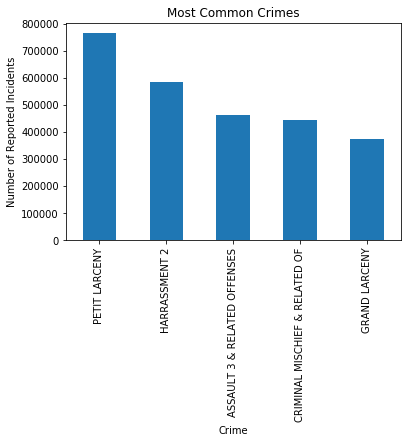

In [25]:
plt.show()

In [28]:
#Showing annual new year's day spike
jan1=data.groupby(['CMPLNT_FR_DT']).count()['CMPLNT_NUM'].plot(title='New Years Crime Wave?')
jan1.set_xlabel("Date")
jan1.set_ylabel("Number of Reports")

Text(0,0.5,'Number of Reports')

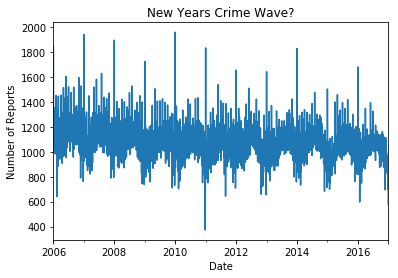

In [29]:
plt.show()

In [48]:
#Counting by year
data['year']=data['CMPLNT_FR_DT'].dt.year
year_count=data.groupby(['year']).count()['CMPLNT_NUM'].sort_values(ascending=False)
year_count

year
2006    425707
2007    416586
2008    404052
2012    393831
2010    392318
2009    392267
2013    388154
2014    387569
2011    386168
2015    378472
2016    373221
Name: CMPLNT_NUM, dtype: int64

In [63]:
year_count.plot(kind='bar', title='Crime Reports per Year', ylim=(360000,440000))

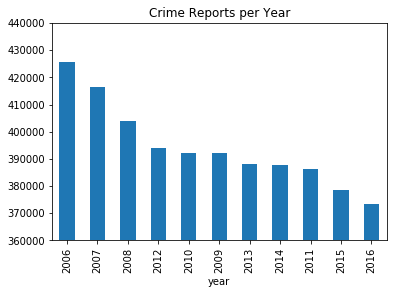

In [64]:
plt.show()

In [69]:
#Counting by day and month to get new years data
data['day']=data['CMPLNT_FR_DT'].dt.day
data['month']=data['CMPLNT_FR_DT'].dt.month
day_count=data.groupby(['day','month']).count()['CMPLNT_NUM'].sort_values(ascending=False)
day_count

day  month
1    1        19512
     6        15718
     8        15316
     7        15252
     9        15030
     5        14847
     4        14635
     10       14627
     11       14411
     3        14224
     2        14039
     12       13883
15   8        12988
20   6        12963
     8        12897
15   6        12873
     5        12869
20   10       12828
15   9        12810
20   7        12810
15   7        12774
20   9        12717
10   8        12693
25   6        12690
     7        12675
20   5        12638
10   7        12621
7    8        12597
24   7        12587
22   6        12580
              ...  
3    1        10873
28   1        10869
19   12       10868
5    2        10867
29   1        10848
21   1        10841
22   11       10840
24   11       10829
23   2        10783
26   1        10777
12   2        10765
11   2        10752
27   11       10742
26   2        10737
9    2        10714
24   2        10690
2    1        10625
26   11       10557
14   2   

In [24]:
top_crimes=data.groupby(['OFNS_DESC']).count()['CMPLNT_NUM'].sort_values(ascending=False).head().plot(kind='bar', title='Most Common Crimes')
top_crimes.set_xlabel("Crime")
top_crimes.set_ylabel("Number of Reported Incidents")

Text(0,0.5,'Number of Reported Incidents')

In [71]:
#Summary statistics on day count.
day_count.describe()

count      366.000000
mean     11853.401639
std        998.590327
min       3069.000000
25%      11422.250000
50%      11859.500000
75%      12246.750000
max      19512.000000
Name: CMPLNT_NUM, dtype: float64